In [81]:
# Description: This program predicts the stock price for a specific date
#               using machine learning algorithms

from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [82]:
df = pd.read_csv('KO_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-11,61.220001,63.000000,59.980000,61.310001,59.424961,12099100
1,2020-03-12,57.130001,57.980000,53.500000,54.599998,52.921261,16856700
2,2020-03-13,57.459999,59.799999,54.459999,59.639999,57.806301,15473500
3,2020-03-16,53.680000,56.889999,52.209999,52.299999,50.691982,13566000
4,2020-03-17,53.630001,59.250000,52.639999,58.000000,56.216724,15473700
...,...,...,...,...,...,...,...
248,2021-03-05,69.400002,70.949997,69.160004,70.629997,70.629997,8294900
249,2021-03-08,71.290001,72.540001,70.779999,71.730003,71.730003,9003600
250,2021-03-09,72.349998,73.050003,71.180000,71.230003,71.230003,8691600
251,2021-03-10,71.709999,73.089996,71.129997,72.699997,72.699997,7398200


In [91]:
df.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
222,2021-01-27,73.529999,74.190002,72.190002,72.419998,72.419998,6279800
223,2021-01-28,72.440002,73.790001,72.220001,72.610001,72.610001,5020000
224,2021-01-29,72.519997,73.300003,71.040001,71.650002,71.650002,6466200
225,2021-02-01,72.080002,72.470001,71.339996,71.459999,71.459999,5207100
226,2021-02-02,71.699997,72.650002,71.199997,71.830002,71.830002,5543900
227,2021-02-03,71.739998,73.669998,71.339996,73.239998,73.239998,6128200
228,2021-02-04,73.400002,74.040001,72.790001,73.000000,73.000000,8117500
229,2021-02-05,73.230003,73.360001,71.930000,72.180000,72.180000,6420200
230,2021-02-08,72.470001,72.989998,72.169998,72.980003,72.980003,5826900
231,2021-02-09,73.239998,74.139999,72.849998,73.489998,73.489998,8100200


In [90]:
# Show and store the last row of data: this is the value I want to preddict
actual_price = df.loc[243,:]

# Show data
actual_price

Date         2021-02-26
Open              69.27
High              69.33
Low               68.02
Close             68.13
Adj Close         68.13
Volume         10222700
Name: 243, dtype: object

In [92]:
# Get all of the data from row 225 to row 242 


In [96]:
# Create empty lists
days = list()
adj_close_prices = list()


In [97]:
# Get only the date and the adjusted close prices
df_days = df.loc[225:242,'Date']
df_adj_close = df.loc[225:242,'Adj Close']

In [98]:
# Create the independent data set (dates)
# Create the dependent data set (adj close prices)
for day in df_days: 
    days.append([int(day.split('-')[2])])

# Create the dependent data set (adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))             

In [99]:
# Show the days
days


[[1],
 [2],
 [3],
 [4],
 [5],
 [8],
 [9],
 [10],
 [11],
 [12],
 [16],
 [17],
 [18],
 [19],
 [22],
 [23],
 [24],
 [25]]

In [100]:
# Show the adj close prices
adj_close_prices


[71.459999,
 71.83000200000001,
 73.239998,
 73.0,
 72.18,
 72.980003,
 73.489998,
 73.83000200000001,
 73.599998,
 74.209999,
 70.529999,
 72.709999,
 71.519997,
 70.41999799999999,
 70.480003,
 69.639999,
 70.400002,
 69.33000200000001]

In [101]:
# Create 3 models
lin_svr = SVR(kernel = 'linear', C = 1000.0)
lin_svr.fit(days,adj_close_prices)

poly_svr = SVR(kernel = 'poly', C = 1000.0, degree = 2)
poly_svr.fit(days,adj_close_prices)

rbf_svr = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.85)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, gamma=0.85)

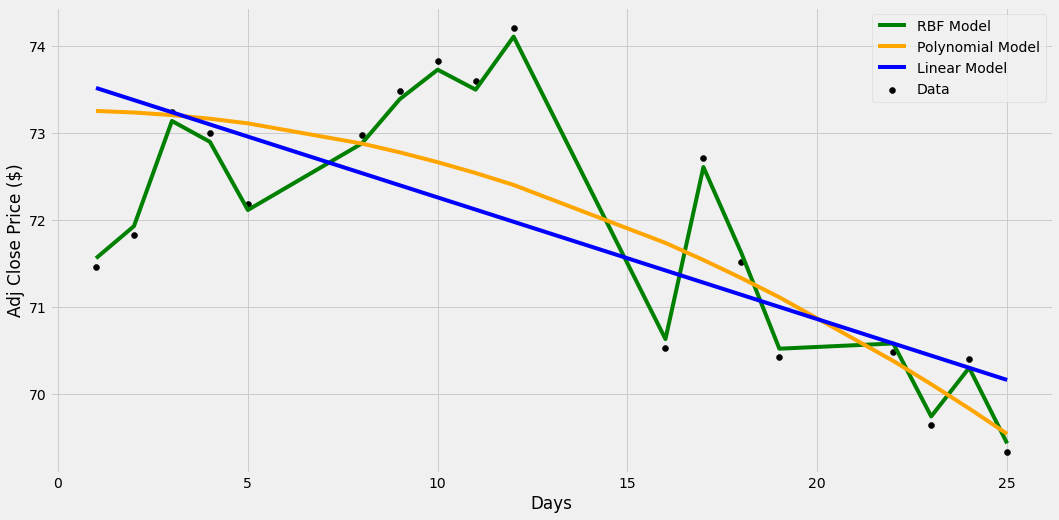

In [102]:
# Plot the models
plt.figure(figsize = (16,8))
plt.scatter(days,adj_close_prices,color='black', label='Data')
plt.plot(days,rbf_svr.predict(days),color = 'green', label = 'RBF Model')
plt.plot(days,poly_svr.predict(days),color = 'orange', label = 'Polynomial Model')
plt.plot(days,lin_svr.predict(days),color = 'blue', label = 'Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price ($)')
plt.legend()
plt.show()

In [103]:
# Show the predicted value for Date 2021-02-26
day = [[26]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The Linear SVR predicted price:',lin_svr.predict(day))
print('The Polynomial SVR predicted price:',poly_svr.predict(day))

The RBF SVR predicted price: [70.77818307]
The Linear SVR predicted price: [70.0200026]
The Polynomial SVR predicted price: [69.23580729]


In [106]:
# Show the actual price
print('The actual price:',actual_price['Adj Close'])

The actual price: 68.129997
